In [ ]:
"""
This notebook has code to show reconstruction loss statistics.
"""

In [ ]:
import json
import os
import sys
import numpy as np
sys.path.append(os.path.abspath(".."))   # one level up from notebook/
from data.utils.dataloaders import get_imagenet_dataloader
import matplotlib.pyplot as plt


/BS/data_mani_compress/work/miniforge3/envs/dgm_geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# read json file 
with open('/BS/data_mani_compress/work/thesis/thesis/data/datasets/imagenet_reconstruction_losses_new/all_reconstruction_losses.json', 'r') as f:
    reconst_losses = json.load(f)

In [4]:
# separate into different token counts
l1_losses_1 = []
lpips_losses_1 = []
l1_losses_2 = []
lpips_losses_2 = []
l1_losses_4 = []
lpips_losses_4 = []
l1_losses_8 = []
lpips_losses_8 = []
l1_losses_16 = []
lpips_losses_16 = []
l1_losses_32 = []
lpips_losses_32 = []
l1_losses_64 = []
lpips_losses_64 = []
l1_losses_128 = []
lpips_losses_128 = []
l1_losses_256 = []
lpips_losses_256 = []
for item in reconst_losses:
    token_count = item['k_value']
    l1_loss = item['L1Loss']
    lpips_loss = item['LPIPS']
    
    if token_count == 1:
        l1_losses_1.append(l1_loss)
        lpips_losses_1.append(lpips_loss)
    elif token_count == 2:
        l1_losses_2.append(l1_loss)
        lpips_losses_2.append(lpips_loss)
    elif token_count == 4:
        l1_losses_4.append(l1_loss)
        lpips_losses_4.append(lpips_loss)
    elif token_count == 8:
        l1_losses_8.append(l1_loss)
        lpips_losses_8.append(lpips_loss)
    elif token_count == 16:
        l1_losses_16.append(l1_loss)
        lpips_losses_16.append(lpips_loss)
    elif token_count == 32:
        l1_losses_32.append(l1_loss)
        lpips_losses_32.append(lpips_loss)
    elif token_count == 64:
        l1_losses_64.append(l1_loss)
        lpips_losses_64.append(lpips_loss)
    elif token_count == 128:
        l1_losses_128.append(l1_loss)
        lpips_losses_128.append(lpips_loss)
    elif token_count == 256:
        l1_losses_256.append(l1_loss)
        lpips_losses_256.append(lpips_loss)

In [38]:
# find the variance of losses across different token counts
lpips_losses_array = np.array([lpips_losses_1, lpips_losses_2, lpips_losses_4, lpips_losses_8,
                               lpips_losses_16, lpips_losses_32, lpips_losses_64,
                               lpips_losses_128, lpips_losses_256])
lpips_variance = np.var(lpips_losses_array, axis=1)

print("LPIPS Loss Variance across different token counts:")
for i, var in enumerate(lpips_variance):
    print(f"k {i+1}: Variance = {var:.6f}")
print(lpips_variance)

LPIPS Loss Variance across different token counts:
k 1: Variance = 0.007508
k 2: Variance = 0.007985
k 3: Variance = 0.008576
k 4: Variance = 0.007321
k 5: Variance = 0.007425
k 6: Variance = 0.007000
k 7: Variance = 0.006917
k 8: Variance = 0.006471
k 9: Variance = 0.005751
[0.00750846 0.00798455 0.00857631 0.00732102 0.00742542 0.00700008
 0.00691718 0.00647061 0.00575089]


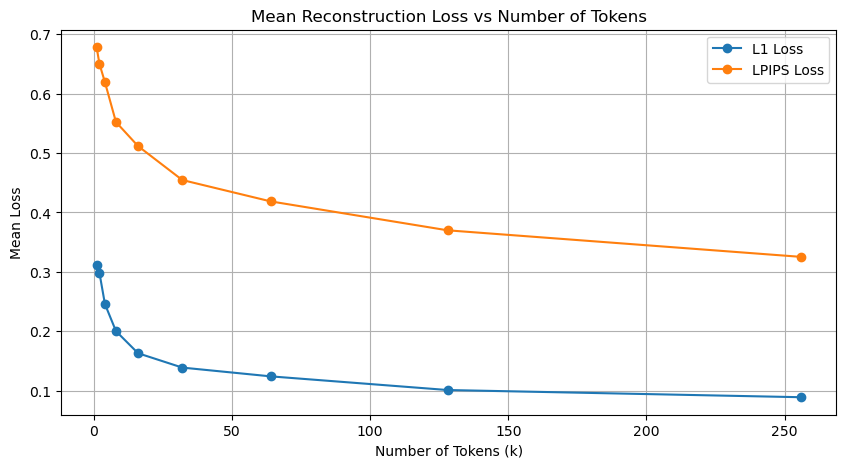

In [ ]:
# plot the means for each k value
k_values = [1, 2, 4, 8, 16, 32, 64, 128, 256]
l1_means = [np.mean(
    
), np.mean(l1_losses_2), np.mean(l1_losses_4), np.mean(l1_losses_8), np.mean(l1_losses_16), np.mean(l1_losses_32), np.mean(l1_losses_64), np.mean(l1_losses_128), np.mean(l1_losses_256)]
lpips_means = [np.mean(lpips_losses_1), np.mean(lpips_losses_2), np.mean(lpips_losses_4), np.mean(lpips_losses_8), np.mean(lpips_losses_16), np.mean(lpips_losses_32), np.mean(lpips_losses_64), np.mean(lpips_losses_128), np.mean(lpips_losses_256)]  
plt.figure(figsize=(10, 5))
plt.plot(k_values, l1_means, marker='o', label='L1 Loss')
plt.plot(k_values, lpips_means, marker='o', label='LPIPS Loss')
plt.xlabel('Number of Tokens (k)')
plt.ylabel('Mean Loss')
plt.title('Mean Reconstruction Loss vs Number of Tokens')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
print(len(reconst_losses))
print(reconst_losses[0])

11530503
{'image_id': 0, 'k_value': 1, 'L1Loss': 0.30568787455558777, 'LPIPS': 0.6564347743988037, 'LPIPS_layers': [0.1586245596408844, 0.11117293685674667, 0.11170255392789841, 0.14455437660217285, 0.1303803026676178]}


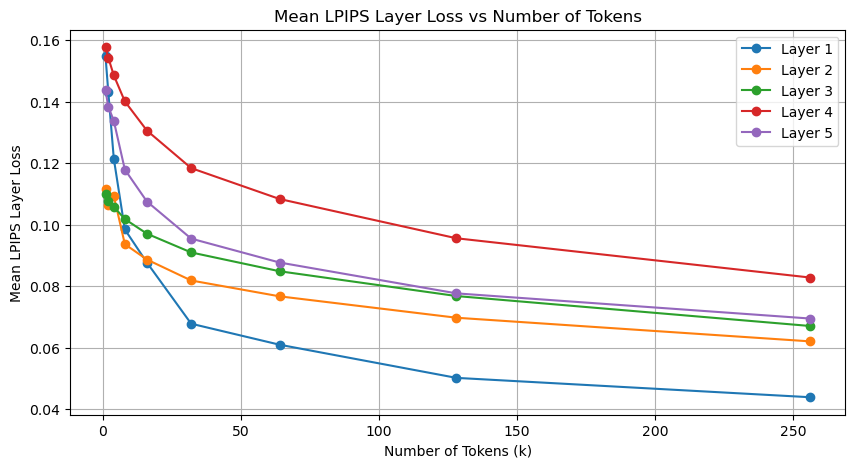

In [ ]:
# LIPIS_layers has the loss for different layers of the LPIPS model. 
# they are stored as a list e.g. 'LPIPS_layers': [0.1586245596408844, 0.11117293685674667, 0.11170255392789841, 0.14455437660217285, 0.1303803026676178] 
# show how different layer losses change with token count
# we average over all images for each token count and plot the means for each layer
layer1_means = []
layer2_means = []
layer3_means = []
layer4_means = []
layer5_means = []
k_values = [1, 2, 4, 8, 16, 32, 64, 128, 256]
for k in k_values:
    layer1 = []
    layer2 = []
    layer3 = []
    layer4 = []
    layer5 = []
    for item in reconst_losses:
        if item['k_value'] == k:
            layer1.append(item['LPIPS_layers'][0])
            layer2.append(item['LPIPS_layers'][1])
            layer3.append(item['LPIPS_layers'][2])
            layer4.append(item['LPIPS_layers'][3])
            layer5.append(item['LPIPS_layers'][4])
    layer1_means.append(np.mean(layer1))
    layer2_means.append(np.mean(layer2))
    layer3_means.append(np.mean(layer3))
    layer4_means.append(np.mean(layer4))
    layer5_means.append(np.mean(layer5))
plt.figure(figsize=(10, 5))
plt.plot(k_values, layer1_means, marker='o', label='Layer 1')
plt.plot(k_values, layer2_means, marker='o', label='Layer 2')
plt.plot(k_values, layer3_means, marker='o', label='Layer 3')
plt.plot(k_values, layer4_means, marker='o', label='Layer 4')
plt.plot(k_values, layer5_means, marker='o', label='Layer 5')
plt.xlabel('Number of Tokens (k)')
plt.ylabel('Mean LPIPS Layer Loss')
plt.title('Mean LPIPS Layer Loss vs Number of Tokens')
plt.legend()
plt.grid(True)
plt.show()  

In [6]:
import torch

imagenet = get_imagenet_dataloader(split="train", batch_size=4)


def denormalize(img_tensor):
    mean = torch.tensor([0.485, 0.456, 0.406], device=img_tensor.device).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225], device=img_tensor.device).view(3, 1, 1)
    return img_tensor * std + mean

In [9]:
# for different token counts get the mean and std of the reconstruction losses
# also get sample images for lowest and highest reconstruction losses
token_counts = [1, 2, 4, 8, 16, 32, 64, 128, 256]
for k in token_counts:
    l1_losses = []
    lpips_losses = []
    for item in reconst_losses:
        if item['k_value'] == k:
            l1_losses.append(item['L1Loss'])
            lpips_losses.append(item['LPIPS'])
    print(f"Token count: {k}")
    print(f"L1 Loss - Mean: {np.mean(l1_losses)}, Std: {np.std(l1_losses)}")
    print(f"LPIPS Loss - Mean: {np.mean(lpips_losses)}, Std: {np.std(lpips_losses)}")
    print()

Token count: 1
L1 Loss - Mean: 0.31134155945843967, Std: 0.08634780252050323
LPIPS Loss - Mean: 0.678007064047031, Std: 0.08665134215682485

Token count: 2
L1 Loss - Mean: 0.2989859706109446, Std: 0.0789195904102479
LPIPS Loss - Mean: 0.6503522398190489, Std: 0.08935631717164878

Token count: 4
L1 Loss - Mean: 0.24600633852068937, Std: 0.06126632093515962
LPIPS Loss - Mean: 0.6192292008274767, Std: 0.09260835342355257

Token count: 8
L1 Loss - Mean: 0.20036547054834644, Std: 0.05650326995898689
LPIPS Loss - Mean: 0.552102992316085, Std: 0.08556293204728128

Token count: 16
L1 Loss - Mean: 0.16318824800044462, Std: 0.047006794325649866
LPIPS Loss - Mean: 0.5116304696166354, Std: 0.08617087003183738

Token count: 32
L1 Loss - Mean: 0.1390497427842794, Std: 0.042785343801660276
LPIPS Loss - Mean: 0.4545905199770213, Std: 0.08366650967527864

Token count: 64
L1 Loss - Mean: 0.12428766843561498, Std: 0.0391318970678629
LPIPS Loss - Mean: 0.41863585693510946, Std: 0.08316959035335712

Token 

In [21]:
# for fixed token count, there are different lists lpips_losses_1, lpips_losses_2, ...
# also, for fixed token count, different images have different reconstruction losses
# we can get the images with lowest and highest reconstruction losses for each token count
# and visualize them. 
lpips_losses_1_sorted_indices = np.argsort(lpips_losses_1)
lowest_indices_1 = lpips_losses_1_sorted_indices[:5]
mid_indices_1 = lpips_losses_1_sorted_indices[len(lpips_losses_1)//2 - 2: len(lpips_losses_1)//2 + 3]
highest_indices_1 = lpips_losses_1_sorted_indices[-5:][::-1]  # top 5 in descending order

lpips_losses_2_sorted_indices = np.argsort(lpips_losses_2)
lowest_indices_2 = lpips_losses_2_sorted_indices[:5]
mid_indices_2 = lpips_losses_2_sorted_indices[len(lpips_losses_2)//2 - 2: len(lpips_losses_2)//2 + 3]
highest_indices_2 = lpips_losses_2_sorted_indices[-5:][::-1]  # top 5 in descending order

lpips_losses_4_sorted_indices = np.argsort(lpips_losses_4)
lowest_indices_4 = lpips_losses_4_sorted_indices[:5]
mid_indices_4 = lpips_losses_4_sorted_indices[len(lpips_losses_4)//2 - 2: len(lpips_losses_4)//2 + 3]
highest_indices_4 = lpips_losses_4_sorted_indices[-5:][::-1]  # top 5 in descending order

lpips_losses_8_sorted_indices = np.argsort(lpips_losses_8)
lowest_indices_8 = lpips_losses_8_sorted_indices[:5]
mid_indices_8 = lpips_losses_8_sorted_indices[len(lpips_losses_8)//2 - 2: len(lpips_losses_8)//2 + 3]
highest_indices_8 = lpips_losses_8_sorted_indices[-5:][::-1]  # top 5 in descending order

lpips_losses_16_sorted_indices = np.argsort(lpips_losses_16)
lowest_indices_16 = lpips_losses_16_sorted_indices[:5]
mid_indices_16 = lpips_losses_16_sorted_indices[len(lpips_losses_16)//2 - 2: len(lpips_losses_16)//2 + 3]
highest_indices_16 = lpips_losses_16_sorted_indices[-5:][::-1]  # top 5 in descending order

lpips_losses_32_sorted_indices = np.argsort(lpips_losses_32)
lowest_indices_32 = lpips_losses_32_sorted_indices[:5]
mid_indices_32 = lpips_losses_32_sorted_indices[len(lpips_losses_32)//2 - 2: len(lpips_losses_32)//2 + 3]
highest_indices_32 = lpips_losses_32_sorted_indices[-5:][::-1]  # top 5 in descending order

lpips_losses_64_sorted_indices = np.argsort(lpips_losses_64)
lowest_indices_64 = lpips_losses_64_sorted_indices[:5]
mid_indices_64 = lpips_losses_64_sorted_indices[len(lpips_losses_64)//2 - 2: len(lpips_losses_64)//2 + 3]
highest_indices_64 = lpips_losses_64_sorted_indices[-5:][::-1]  # top 5 in descending order

lpips_losses_128_sorted_indices = np.argsort(lpips_losses_128)
lowest_indices_128 = lpips_losses_128_sorted_indices[:5]
mid_indices_128 = lpips_losses_128_sorted_indices[len(lpips_losses_128)//2 - 2: len(lpips_losses_128)//2 + 3]
highest_indices_128 = lpips_losses_128_sorted_indices[-5:][::-1]  # top 5 in descending order

lpips_losses_256_sorted_indices = np.argsort(lpips_losses_256)
lowest_indices_256 = lpips_losses_256_sorted_indices[:5]
mid_indices_256 = lpips_losses_256_sorted_indices[len(lpips_losses_256)//2 - 2: len(lpips_losses_256)//2 + 3]
highest_indices_256 = lpips_losses_256_sorted_indices[-5:][::-1]  # top 5 in descending order

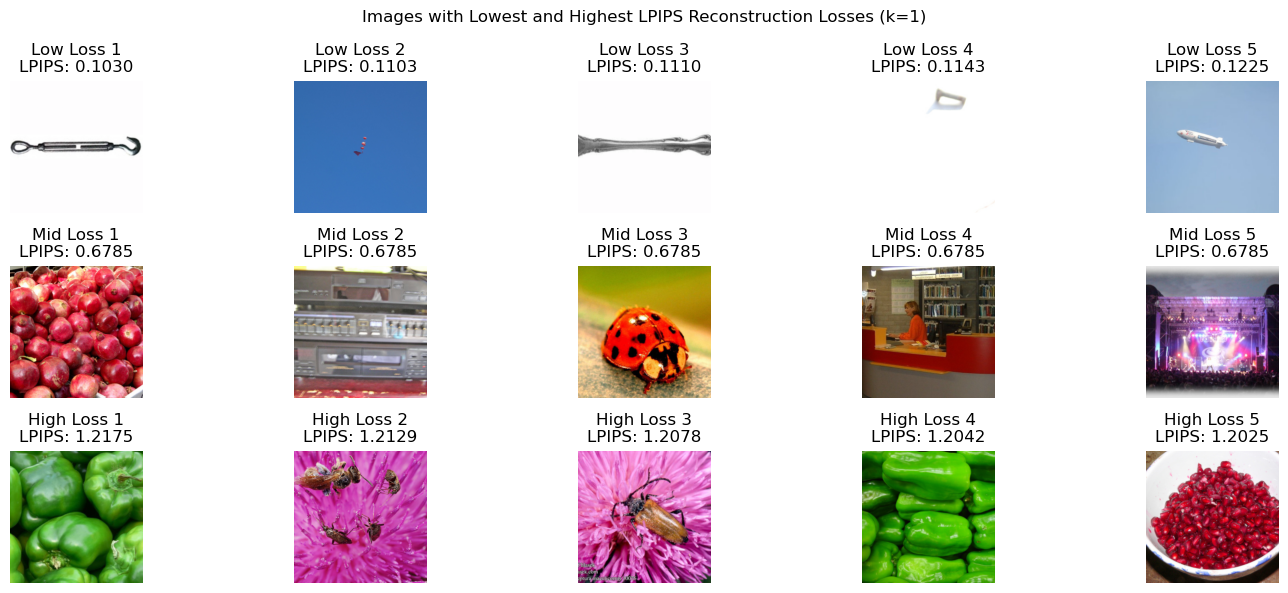

In [22]:
# plot images with lowest and highest reconstruction losses for token count of 1
# subplot of 3 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
for i, idx in enumerate(lowest_indices_1):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Low Loss {i+1}\nLPIPS: {lpips_losses_1[idx]:.4f}")
    axs[0, i].axis('off')
for i, idx in enumerate(mid_indices_1):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Mid Loss {i+1}\nLPIPS: {lpips_losses_1[idx]:.4f}")
    axs[1, i].axis('off')

for i, idx in enumerate(highest_indices_1):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[2, i].imshow(img)
    axs[2, i].set_title(f"High Loss {i+1}\nLPIPS: {lpips_losses_1[idx]:.4f}")
    axs[2, i].axis('off')

plt.suptitle("Images with Lowest and Highest LPIPS Reconstruction Losses (k=1)")
plt.tight_layout()
plt.show()

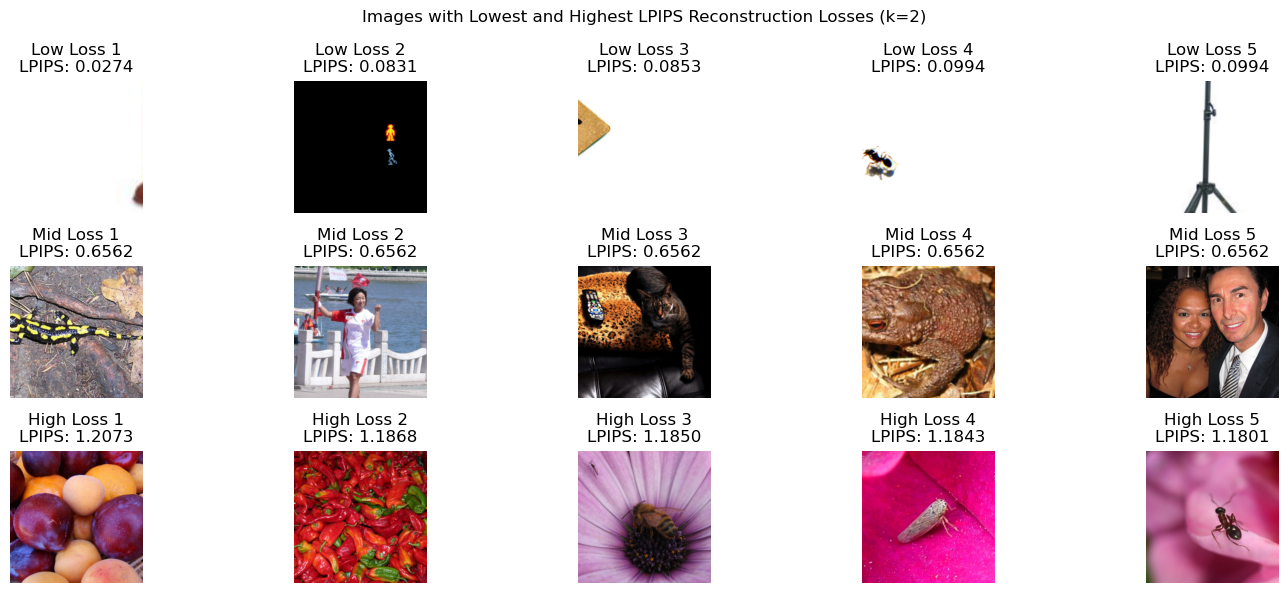

In [24]:
# plot images with lowest and highest reconstruction losses for token count of 2
# subplot of 2 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
for i, idx in enumerate(lowest_indices_2):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Low Loss {i+1}\nLPIPS: {lpips_losses_2[idx]:.4f}")
    axs[0, i].axis('off')
for i, idx in enumerate(mid_indices_2):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Mid Loss {i+1}\nLPIPS: {lpips_losses_2[idx]:.4f}")
    axs[1, i].axis('off')
for i, idx in enumerate(highest_indices_2):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[2, i].imshow(img)
    axs[2, i].set_title(f"High Loss {i+1}\nLPIPS: {lpips_losses_2[idx]:.4f}")
    axs[2, i].axis('off')
plt.suptitle("Images with Lowest and Highest LPIPS Reconstruction Losses (k=2)")
plt.tight_layout()
plt.show()

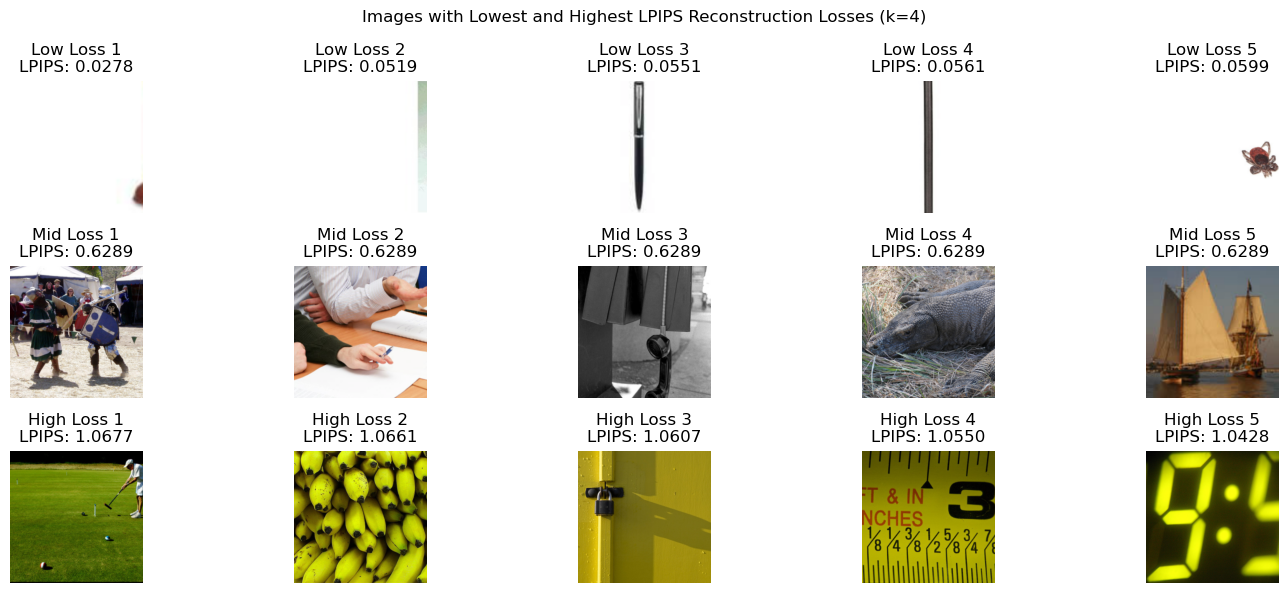

In [25]:
# plot images with lowest and highest reconstruction losses for token count of 4
# subplot of 2 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
for i, idx in enumerate(lowest_indices_4):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Low Loss {i+1}\nLPIPS: {lpips_losses_4[idx]:.4f}")
    axs[0, i].axis('off')
for i, idx in enumerate(mid_indices_4):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Mid Loss {i+1}\nLPIPS: {lpips_losses_4[idx]:.4f}")
    axs[1, i].axis('off')
for i, idx in enumerate(highest_indices_4):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[2, i].imshow(img)
    axs[2, i].set_title(f"High Loss {i+1}\nLPIPS: {lpips_losses_4[idx]:.4f}")
    axs[2, i].axis('off')
plt.suptitle("Images with Lowest and Highest LPIPS Reconstruction Losses (k=4)")
plt.tight_layout()
plt.show()

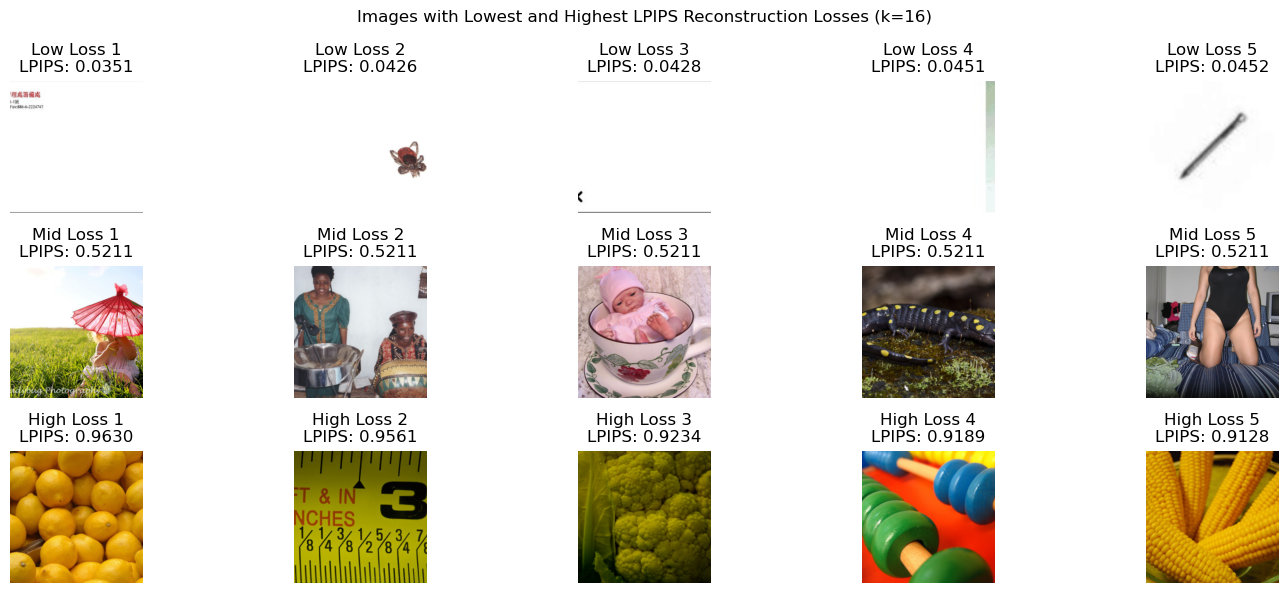

In [27]:
# plot images with lowest and highest reconstruction losses for token count of 16
# subplot of 2 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
for i, idx in enumerate(lowest_indices_16):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Low Loss {i+1}\nLPIPS: {lpips_losses_16[idx]:.4f}")
    axs[0, i].axis('off')
for i, idx in enumerate(mid_indices_16):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Mid Loss {i+1}\nLPIPS: {lpips_losses_16[idx]:.4f}")
    axs[1, i].axis('off')
for i, idx in enumerate(highest_indices_16):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[2, i].imshow(img)
    axs[2, i].set_title(f"High Loss {i+1}\nLPIPS: {lpips_losses_16[idx]:.4f}")
    axs[2, i].axis('off')
plt.suptitle("Images with Lowest and Highest LPIPS Reconstruction Losses (k=16)")
plt.tight_layout()
plt.show()

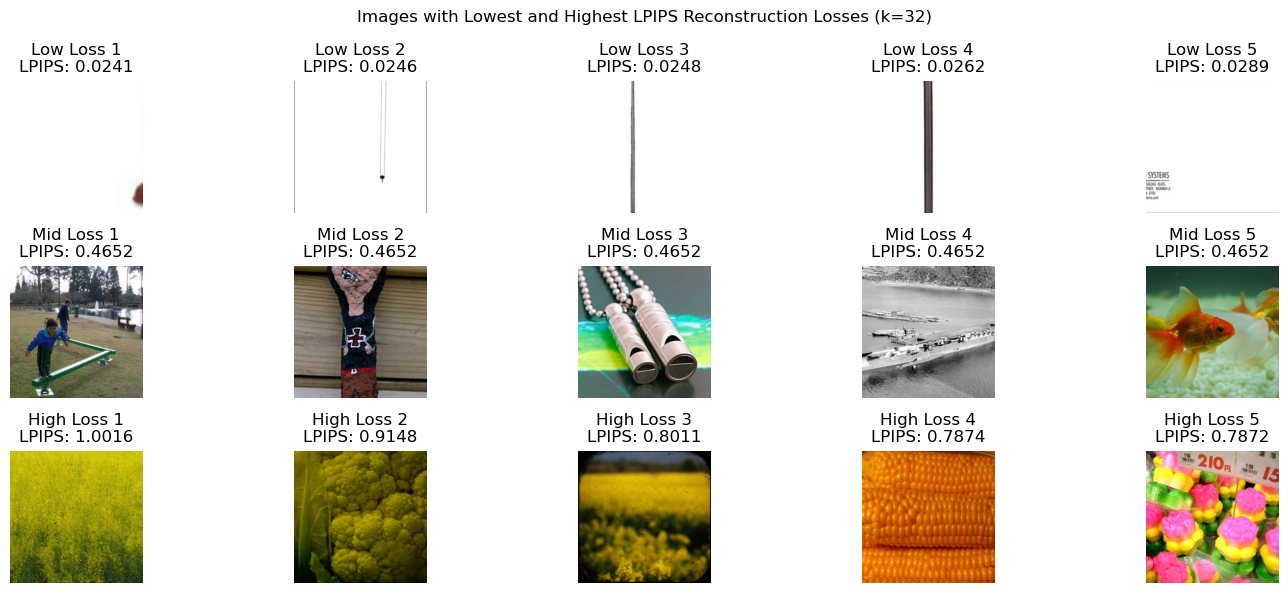

In [28]:
# plot images with lowest and highest reconstruction losses for token count of 32
# subplot of 2 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
for i, idx in enumerate(lowest_indices_32):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Low Loss {i+1}\nLPIPS: {lpips_losses_32[idx]:.4f}")
    axs[0, i].axis('off')
for i, idx in enumerate(mid_indices_32):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Mid Loss {i+1}\nLPIPS: {lpips_losses_32[idx]:.4f}")
    axs[1, i].axis('off')
for i, idx in enumerate(highest_indices_32):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[2, i].imshow(img)
    axs[2, i].set_title(f"High Loss {i+1}\nLPIPS: {lpips_losses_32[idx]:.4f}")
    axs[2, i].axis('off')
plt.suptitle("Images with Lowest and Highest LPIPS Reconstruction Losses (k=32)")
plt.tight_layout()
plt.show()

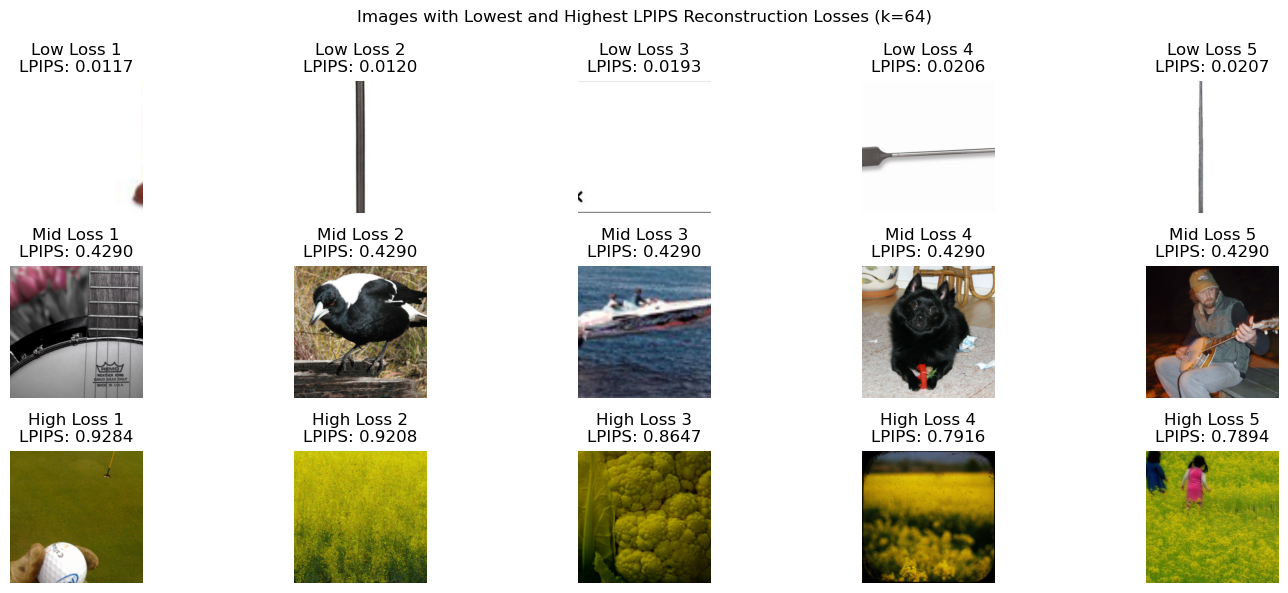

In [29]:
# plot images with lowest and highest reconstruction losses for token count of 64
# subplot of 3 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
for i, idx in enumerate(lowest_indices_64):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Low Loss {i+1}\nLPIPS: {lpips_losses_64[idx]:.4f}")
    axs[0, i].axis('off')
for i, idx in enumerate(mid_indices_64):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Mid Loss {i+1}\nLPIPS: {lpips_losses_64[idx]:.4f}")
    axs[1, i].axis('off')
for i, idx in enumerate(highest_indices_64):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[2, i].imshow(img)
    axs[2, i].set_title(f"High Loss {i+1}\nLPIPS: {lpips_losses_64[idx]:.4f}")
    axs[2, i].axis('off')
plt.suptitle("Images with Lowest and Highest LPIPS Reconstruction Losses (k=64)")
plt.tight_layout()
plt.show()

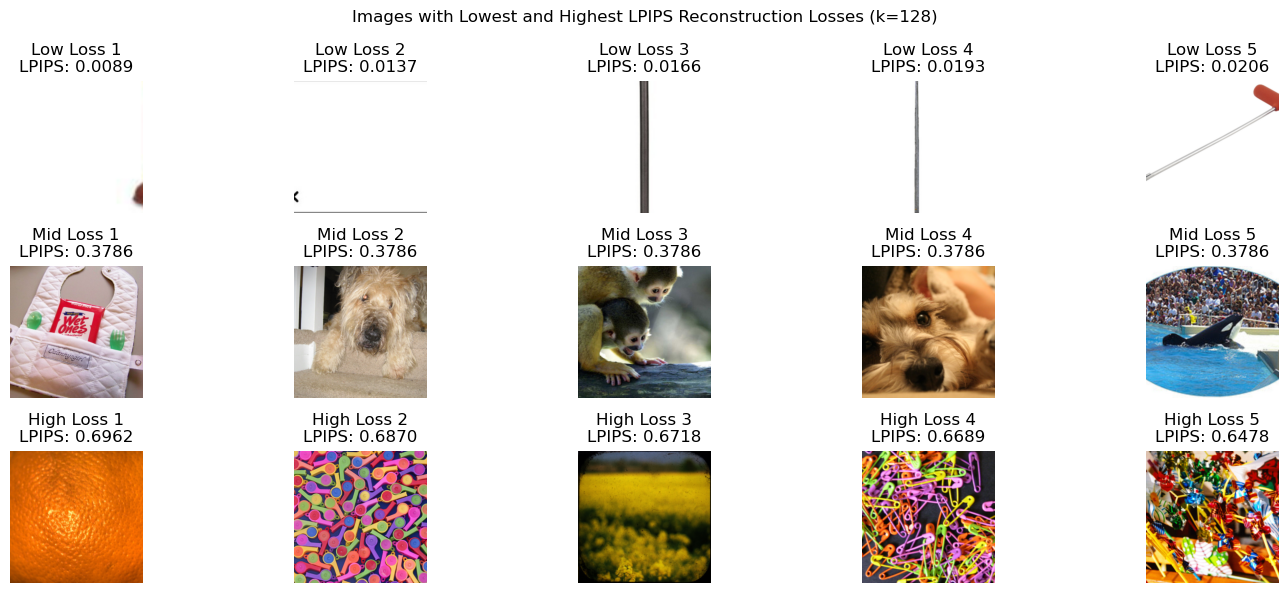

In [30]:
# plot images with lowest and highest reconstruction losses for token count of 128
# subplot of 3 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
for i, idx in enumerate(lowest_indices_128):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Low Loss {i+1}\nLPIPS: {lpips_losses_128[idx]:.4f}")
    axs[0, i].axis('off')
for i, idx in enumerate(mid_indices_128):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Mid Loss {i+1}\nLPIPS: {lpips_losses_128[idx]:.4f}")
    axs[1, i].axis('off')
for i, idx in enumerate(highest_indices_128):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[2, i].imshow(img)
    axs[2, i].set_title(f"High Loss {i+1}\nLPIPS: {lpips_losses_128[idx]:.4f}")
    axs[2, i].axis('off')
plt.suptitle("Images with Lowest and Highest LPIPS Reconstruction Losses (k=128)")
plt.tight_layout()
plt.show()

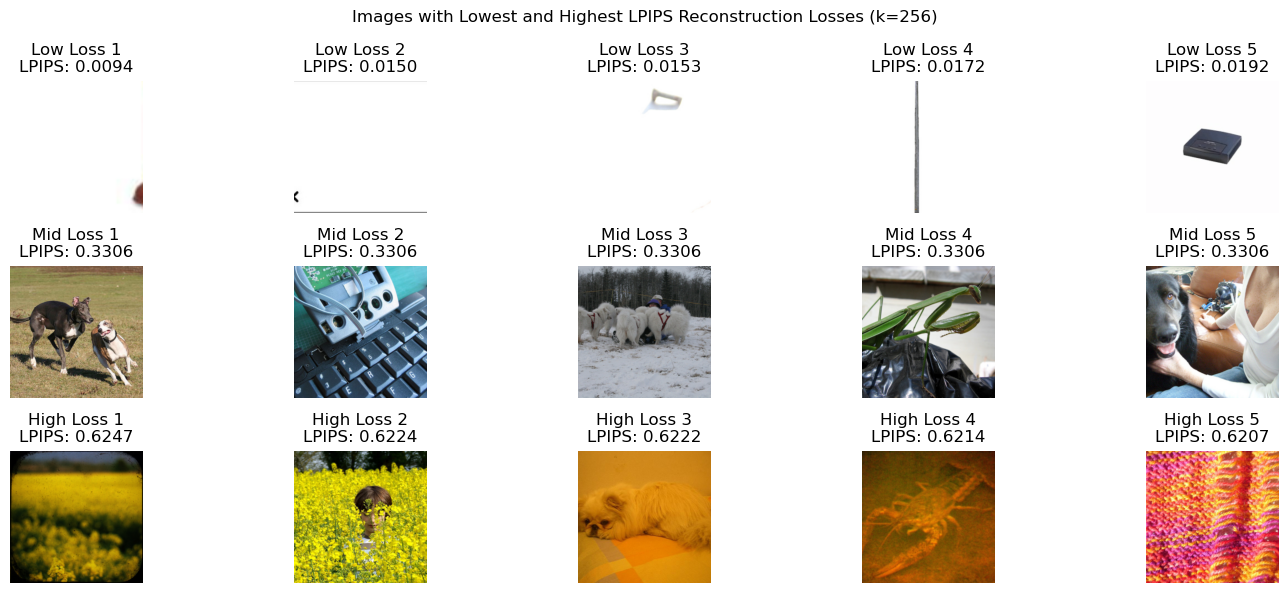

In [31]:
# plot images with lowest and highest reconstruction losses for token count of 256
# subplot of 3 rows and 5 columns
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
for i, idx in enumerate(lowest_indices_256):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Low Loss {i+1}\nLPIPS: {lpips_losses_256[idx]:.4f}")
    axs[0, i].axis('off')
for i, idx in enumerate(mid_indices_256):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Mid Loss {i+1}\nLPIPS: {lpips_losses_256[idx]:.4f}")
    axs[1, i].axis('off')
for i, idx in enumerate(highest_indices_256):
    img, _ = imagenet.dataset[idx]
    img = denormalize(img).permute(1, 2, 0).cpu().numpy()
    axs[2, i].imshow(img)
    axs[2, i].set_title(f"High Loss {i+1}\nLPIPS: {lpips_losses_256[idx]:.4f}")
    axs[2, i].axis('off')   
plt.suptitle("Images with Lowest and Highest LPIPS Reconstruction Losses (k=256)")
plt.tight_layout()
plt.show()